In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

%matplotlib inline


In [121]:
sns.__version__

'0.9.0'

In [122]:
!ls

customer_support_cases.csv request_quotes.csv
pros.csv                   thumbstack.ipynb


In [123]:
request_quotes = pd.read_csv('request_quotes.csv')
pros = pd.read_csv('pros.csv')
cs = pd.read_csv('customer_support_cases.csv')

request_quotes = request_quotes[~request_quotes['pro_id'].isnull()]

In [124]:
cs

,pro_id,case_number,case_first_contact_channel,case_category,case_subcategory,case_created_time,case_closed_time,case_first_response_time,post_case_satisfaction_survey_score
0,2.869220e+17,5347881,Phone,Account,Login and password,10/29/18 16:35,10/29/18 17:01,10/29/18 17:05,NaN
1,3.362550e+17,5193983,Phone,Account,Inbox,9/27/18 23:29,10/1/18 14:46,9/27/18 23:36,NaN
2,3.205210e+17,4842569,SMS,Account,License,7/13/18 16:32,7/13/18 22:23,7/13/18 16:32,NaN
3,3.347250e+17,4959321,Phone,Account,Reactivate,8/14/18 19:09,8/14/18 19:26,8/14/18 19:30,NaN
4,3.362550e+17,5053741,Phone,Account,Profile,9/5/18 16:49,9/5/18 17:17,9/5/18 17:17,NaN
5,2.476980e+17,5174527,Phone,Account,Reactivate,9/24/18 20:10,9/24/18 20:25,9/24/18 20:41,NaN
6,3.097600e+17,4896377,Phone,Account,Reactivate,7/26/18 19:14,7/26/18 19:36,7/26/18 19:34,NaN
7,3.362550e+17,5291929,Phone,Account,Login and password,10/18/18 16:02,10/19/18 16:24,10/18/18 16:31,NaN
8,3.293470e+17,5181916,SMS,Account,Reactivate,9/25/18 21:50,9/25/18 22:27,9/25/18 21:50,NaN
9,2.780710e+17,5267698,Phone,Account,Inbox,10/12/18 19:19,10/12/18 19:23,10/12/18 19:31,NaN


In [64]:
cs['pro_id'] = cs['pro_id'].astype('int').astype('str')
pros['pro_id'] = pros['pro_id'].astype('int').astype('str')
request_quotes[['request_id', 'customer_id', 'pro_id']] = request_quotes[['request_id', 'customer_id', 'pro_id']].astype('int').astype('str')


cs['case_category'] = cs.case_category.apply(lambda x: 'Account' if x == 'Account / Profile' else x)



In [65]:
pros.head()

,pro_id,pro_signup_date,pro_days_in_business,pro_most_quoted_category,pro_num_quotes_lifetime,pro_num_times_contacted_by_customer_lifetime,pro_num_times_marked_hired_lifetime,pro_num_reviews_lifetime,pro_avg_review_rating
0,88480800000000000,10/21/10 1:59,2961,Tree Trimming and Removal,261,73,15,8,4.75
1,92769900000000000,12/9/10 17:25,2912,Sprinkler and Irrigation System Repair and Mai...,418,162,44,43,4.60
2,102449000000000000,3/31/11 18:11,2800,Lawn Mowing and Trimming,1086,387,160,99,4.79
3,107230000000000000,5/26/11 2:02,2744,Concrete Installation,340,79,3,2,3.50
4,108308000000000000,6/7/11 13:32,2732,Lawn Mowing and Trimming,58,31,17,10,5.00


In [66]:
cs

,pro_id,case_number,case_first_contact_channel,case_category,case_subcategory,case_created_time,case_closed_time,case_first_response_time,post_case_satisfaction_survey_score
0,286922000000000000,5347881,Phone,Account,Login and password,10/29/18 16:35,10/29/18 17:01,10/29/18 17:05,NaN
1,336255000000000000,5193983,Phone,Account,Inbox,9/27/18 23:29,10/1/18 14:46,9/27/18 23:36,NaN
2,320521000000000000,4842569,SMS,Account,License,7/13/18 16:32,7/13/18 22:23,7/13/18 16:32,NaN
3,334725000000000000,4959321,Phone,Account,Reactivate,8/14/18 19:09,8/14/18 19:26,8/14/18 19:30,NaN
4,336255000000000000,5053741,Phone,Account,Profile,9/5/18 16:49,9/5/18 17:17,9/5/18 17:17,NaN
5,247698000000000000,5174527,Phone,Account,Reactivate,9/24/18 20:10,9/24/18 20:25,9/24/18 20:41,NaN
6,309760000000000000,4896377,Phone,Account,Reactivate,7/26/18 19:14,7/26/18 19:36,7/26/18 19:34,NaN
7,336255000000000000,5291929,Phone,Account,Login and password,10/18/18 16:02,10/19/18 16:24,10/18/18 16:31,NaN
8,329347000000000000,5181916,SMS,Account,Reactivate,9/25/18 21:50,9/25/18 22:27,9/25/18 21:50,NaN
9,278071000000000000,5267698,Phone,Account,Inbox,10/12/18 19:19,10/12/18 19:23,10/12/18 19:31,NaN


In [67]:
request_quotes.head()

,request_id,customer_id,request_create_time,request_category,request_occupation,request_zip_code,request_city,request_state,request_cbsa,quote_id,quote_sent_time,pro_id,quote_type,syndication_type,pro_zip_code,pro_distance_to_request_zip,minutes_from_request_to_quote,pro_contacted_by_customer,thumbtack_revenue_from_quote
0,315787000000000000,264366000000000000,1/2/18 22:32,Outdoor Landscaping and Design,Landscaper,84093,Sandy,UT,"Salt Lake City, UT",3.157950e+17,1/3/18 0:50,307767000000000000,custom,NaN,84044.0,17.280257,138.0,False,0.00
1,315787000000000000,264366000000000000,1/2/18 22:32,Outdoor Landscaping and Design,Landscaper,84093,Sandy,UT,"Salt Lake City, UT",3.157880e+17,1/2/18 22:49,293675000000000000,custom,NaN,84088.0,9.089775,18.0,False,10.02
2,315787000000000000,264366000000000000,1/2/18 22:32,Outdoor Landscaping and Design,Landscaper,84093,Sandy,UT,"Salt Lake City, UT",3.157870e+17,1/2/18 22:35,254195000000000000,custom,NaN,84115.0,9.055618,4.0,False,10.02
3,315787000000000000,264366000000000000,1/2/18 22:32,Outdoor Landscaping and Design,Landscaper,84093,Sandy,UT,"Salt Lake City, UT",3.157930e+17,1/3/18 0:10,232946000000000000,custom,NaN,84065.0,8.050513,98.0,False,0.00
4,315787000000000000,264366000000000000,1/2/18 22:32,Outdoor Landscaping and Design,Landscaper,84093,Sandy,UT,"Salt Lake City, UT",3.157870e+17,1/2/18 22:32,310234000000000000,instant,standard_quote,84090.0,1.815267,0.0,True,53.44


In [68]:
cs = cs.merge(pros[['pro_signup_date', 'pro_id']], on='pro_id', how='left')

In [69]:
revenue_per_pro = request_quotes.groupby('pro_id').agg({'thumbtack_revenue_from_quote': [np.sum, np.size]})

In [70]:
revenue_per_pro.columns.droplevel(0)

Index(['sum', 'size'], dtype='object')

In [71]:
pros['conversion_rate'] = pros.pro_num_times_marked_hired_lifetime/pros.pro_num_quotes_lifetime

In [72]:
np.percentile(pros['pro_num_quotes_lifetime'], q=10)

12.0

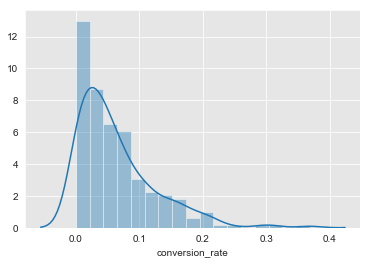

In [73]:
sns.distplot(pros[pros['pro_num_quotes_lifetime'] > 12].conversion_rate)

In [74]:
first_quote_time = request_quotes.groupby('pro_id').quote_sent_time.min()

In [75]:
first_quote_time.to_frame()

,quote_sent_time
pro_id,
102449000000000000,1/12/18 20:26
107230000000000000,2/1/18 22:00
108308000000000000,10/28/18 23:22
132550000000000000,2/12/18 17:06
137348000000000000,1/15/18 15:54
176057000000000000,1/19/18 6:43
192933000000000000,10/22/18 19:35
206459000000000000,1/17/18 3:48
206499000000000000,3/24/18 20:19


In [76]:
# cs.groupby('case_category').case_category.count()

In [77]:
cs = cs.merge(first_quote_time.to_frame(), left_on='pro_id', right_index=True, how='left')

In [78]:
cs

,pro_id,case_number,case_first_contact_channel,case_category,case_subcategory,case_created_time,case_closed_time,case_first_response_time,post_case_satisfaction_survey_score,pro_signup_date,quote_sent_time
0,286922000000000000,5347881,Phone,Account,Login and password,10/29/18 16:35,10/29/18 17:01,10/29/18 17:05,NaN,2/2/17 20:31,1/28/18 22:12
1,336255000000000000,5193983,Phone,Account,Inbox,9/27/18 23:29,10/1/18 14:46,9/27/18 23:36,NaN,8/27/18 20:07,10/1/18 0:33
2,320521000000000000,4842569,SMS,Account,License,7/13/18 16:32,7/13/18 22:23,7/13/18 16:32,NaN,7/11/18 4:05,10/1/18 23:50
3,334725000000000000,4959321,Phone,Account,Reactivate,8/14/18 19:09,8/14/18 19:26,8/14/18 19:30,NaN,8/10/18 3:14,8/10/18 15:06
4,336255000000000000,5053741,Phone,Account,Profile,9/5/18 16:49,9/5/18 17:17,9/5/18 17:17,NaN,8/27/18 20:07,10/1/18 0:33
5,247698000000000000,5174527,Phone,Account,Reactivate,9/24/18 20:10,9/24/18 20:25,9/24/18 20:41,NaN,11/6/15 21:02,2/24/18 20:07
6,309760000000000000,4896377,Phone,Account,Reactivate,7/26/18 19:14,7/26/18 19:36,7/26/18 19:34,NaN,10/25/17 4:19,6/26/18 4:15
7,336255000000000000,5291929,Phone,Account,Login and password,10/18/18 16:02,10/19/18 16:24,10/18/18 16:31,NaN,8/27/18 20:07,10/1/18 0:33
8,329347000000000000,5181916,SMS,Account,Reactivate,9/25/18 21:50,9/25/18 22:27,9/25/18 21:50,NaN,6/8/18 21:14,6/16/18 21:01
9,278071000000000000,5267698,Phone,Account,Inbox,10/12/18 19:19,10/12/18 19:23,10/12/18 19:31,NaN,10/23/16 9:57,10/11/18 13:13


In [79]:
#idx 90 must be a mistake as there isn't a closed_time
cs = cs.drop(axis=0, index=90)
cs = cs.reset_index(drop = True)

In [80]:
cs

,pro_id,case_number,case_first_contact_channel,case_category,case_subcategory,case_created_time,case_closed_time,case_first_response_time,post_case_satisfaction_survey_score,pro_signup_date,quote_sent_time
0,286922000000000000,5347881,Phone,Account,Login and password,10/29/18 16:35,10/29/18 17:01,10/29/18 17:05,NaN,2/2/17 20:31,1/28/18 22:12
1,336255000000000000,5193983,Phone,Account,Inbox,9/27/18 23:29,10/1/18 14:46,9/27/18 23:36,NaN,8/27/18 20:07,10/1/18 0:33
2,320521000000000000,4842569,SMS,Account,License,7/13/18 16:32,7/13/18 22:23,7/13/18 16:32,NaN,7/11/18 4:05,10/1/18 23:50
3,334725000000000000,4959321,Phone,Account,Reactivate,8/14/18 19:09,8/14/18 19:26,8/14/18 19:30,NaN,8/10/18 3:14,8/10/18 15:06
4,336255000000000000,5053741,Phone,Account,Profile,9/5/18 16:49,9/5/18 17:17,9/5/18 17:17,NaN,8/27/18 20:07,10/1/18 0:33
5,247698000000000000,5174527,Phone,Account,Reactivate,9/24/18 20:10,9/24/18 20:25,9/24/18 20:41,NaN,11/6/15 21:02,2/24/18 20:07
6,309760000000000000,4896377,Phone,Account,Reactivate,7/26/18 19:14,7/26/18 19:36,7/26/18 19:34,NaN,10/25/17 4:19,6/26/18 4:15
7,336255000000000000,5291929,Phone,Account,Login and password,10/18/18 16:02,10/19/18 16:24,10/18/18 16:31,NaN,8/27/18 20:07,10/1/18 0:33
8,329347000000000000,5181916,SMS,Account,Reactivate,9/25/18 21:50,9/25/18 22:27,9/25/18 21:50,NaN,6/8/18 21:14,6/16/18 21:01
9,278071000000000000,5267698,Phone,Account,Inbox,10/12/18 19:19,10/12/18 19:23,10/12/18 19:31,NaN,10/23/16 9:57,10/11/18 13:13


In [81]:
date_columns = ['case_created_time', 'case_closed_time', 'case_first_response_time', 'pro_signup_date', 'pro_signup_date', 'quote_sent_time']
for col in date_columns:
    cs[col] = pd.to_datetime(cs[col])
    cs['dow' + '_' + col] = cs[col].apply(lambda x: x.weekday())

In [82]:
cs

,pro_id,case_number,case_first_contact_channel,case_category,case_subcategory,case_created_time,case_closed_time,case_first_response_time,post_case_satisfaction_survey_score,pro_signup_date,quote_sent_time,dow_case_created_time,dow_case_closed_time,dow_case_first_response_time,dow_pro_signup_date,dow_quote_sent_time
0,286922000000000000,5347881,Phone,Account,Login and password,2018-10-29 16:35:00,2018-10-29 17:01:00,2018-10-29 17:05:00,NaN,2017-02-02 20:31:00,2018-01-28 22:12:00,0,0.0,0.0,3,6
1,336255000000000000,5193983,Phone,Account,Inbox,2018-09-27 23:29:00,2018-10-01 14:46:00,2018-09-27 23:36:00,NaN,2018-08-27 20:07:00,2018-10-01 00:33:00,3,0.0,3.0,0,0
2,320521000000000000,4842569,SMS,Account,License,2018-07-13 16:32:00,2018-07-13 22:23:00,2018-07-13 16:32:00,NaN,2018-07-11 04:05:00,2018-10-01 23:50:00,4,4.0,4.0,2,0
3,334725000000000000,4959321,Phone,Account,Reactivate,2018-08-14 19:09:00,2018-08-14 19:26:00,2018-08-14 19:30:00,NaN,2018-08-10 03:14:00,2018-08-10 15:06:00,1,1.0,1.0,4,4
4,336255000000000000,5053741,Phone,Account,Profile,2018-09-05 16:49:00,2018-09-05 17:17:00,2018-09-05 17:17:00,NaN,2018-08-27 20:07:00,2018-10-01 00:33:00,2,2.0,2.0,0,0
5,247698000000000000,5174527,Phone,Account,Reactivate,2018-09-24 20:10:00,2018-09-24 20:25:00,2018-09-24 20:41:00,NaN,2015-11-06 21:02:00,2018-02-24 20:07:00,0,0.0,0.0,4,5
6,309760000000000000,4896377,Phone,Account,Reactivate,2018-07-26 19:14:00,2018-07-26 19:36:00,2018-07-26 19:34:00,NaN,2017-10-25 04:19:00,2018-06-26 04:15:00,3,3.0,3.0,2,1
7,336255000000000000,5291929,Phone,Account,Login and password,2018-10-18 16:02:00,2018-10-19 16:24:00,2018-10-18 16:31:00,NaN,2018-08-27 20:07:00,2018-10-01 00:33:00,3,4.0,3.0,0,0
8,329347000000000000,5181916,SMS,Account,Reactivate,2018-09-25 21:50:00,2018-09-25 22:27:00,2018-09-25 21:50:00,NaN,2018-06-08 21:14:00,2018-06-16 21:01:00,1,1.0,1.0,4,5
9,278071000000000000,5267698,Phone,Account,Inbox,2018-10-12 19:19:00,2018-10-12 19:23:00,2018-10-12 19:31:00,NaN,2016-10-23 09:57:00,2018-10-11 13:13:00,4,4.0,4.0,6,3


In [83]:
#fill case_first_repsonse_time nulls with case_closed_time
cs['case_first_response_time'] = cs.case_first_response_time.fillna(cs['case_closed_time'])

In [86]:
cs['td_closed_created'] = (cs.case_closed_time - cs.case_created_time)/np.timedelta64(1, 'm')
cs['td_closed_first_response'] = (cs.case_closed_time - cs.case_first_response_time)/np.timedelta64(1, 'm')
cs['td_first_response_created'] = (cs.case_first_response_time - cs.case_created_time)/np.timedelta64(1, 'm')
cs['td_created_signup'] = (cs.case_created_time - cs.pro_signup_date)/np.timedelta64(1, 'm')
cs['td_first_quote_signup'] = (cs.quote_sent_time - cs.pro_signup_date)/np.timedelta64(1, 'm')


In [87]:
#find the first cs ticket per pro_id
def find_min_signup(mi, td):
    if mi == td:
        return 1
    else:
        return 0
    
cs['min_td_created_signup'] = cs.groupby('pro_id')['td_created_signup'].transform(np.min)
cs['first_ticket'] = (cs[['min_td_created_signup', 'td_created_signup']]
                                    .apply(lambda x: find_min_signup(x['min_td_created_signup']
                                                                     , x['td_created_signup']), axis=1)
                                   )

In [88]:
cs_first_ticket = cs.groupby(['case_category', 'first_ticket']).agg({'case_number': np.size
                                                                                  , 'td_closed_created': np.median})

In [90]:
cs_first_ticket

case_number  td_closed_created
case_category              first_ticket                                
Account                    0                      33               23.0
                           1                      20               16.0
Account credit & refunds   0                      31              432.0
                           1                       7             1064.0
Channel specific: Chat     0                       1                5.0
Channel specific: Email    0                       1                NaN
Channel specific: Phone    0                       4                3.0
                           1                       2              490.5
Chat                       0                       1                6.0
Deactivate account         0                      17               45.0
                           1                       3               26.5
Delete Account             0                       4              513.0
                           1                       4                7.5
Getting Started            0                       4               24.5
                           1                       3               10.0
How Thumbtack works        0                       1               23.0
                           1                       1               13.0
Instant Match              0                      13               37.0
                           1                      13               70.0
Jobs                       0                      13              528.0
                           1                       1             1246.0
Landing Pages              0                       4              512.0
Leads                      0                       3              331.0
MTS related concern        0                       5              827.0
                           1                       2             1843.0
Misc.                      0                       2              959.0
                           1                       1               18.0
Notifications              0                       1              157.0
Other                      0                       4               36.0
                           1                       2             5306.0
Payments through Thumbtack 0                       1                9.0
                           1                       1               10.0
Phone                      0                       3               11.0
                           1                       4                4.5
Pricing and Payments       0                      22               18.5
                           1                      11               18.0
Pricing/Payments           0                      18               52.5
                           1                       6               27.5
Projects                   0                       2                7.5
Quotes                     0                      17               51.0
                           1                      10              873.0
Quotes (prices estimates)  0                       3               59.0
Refunds                    0                      21              255.0
                           1                      11               72.0
Requests                   0                       4              562.0
                           1                       6              929.5
Reviews                    0                      16              127.5
                           1                       7             2138.0
Services                   0                       4              146.5

In [91]:
cs_first_ticket = (cs_first_ticket.reset_index().pivot(index='case_category'
                                    , columns='first_ticket'
                                   , values=['case_number', 'td_closed_created']))

In [92]:
cs_first_ticket.columns = ['first_ticket__0', 'first_ticket__1', 'td_closed_created__0_med', 'td_closed_created__1_med']

In [93]:
cs_first_ticket['td_closed_created__0_med_log'] = cs_first_ticket['td_closed_created__0_med'].apply(np.log)
cs_first_ticket['td_closed_created__1_med_log'] = cs_first_ticket['td_closed_created__1_med'].apply(np.log)

In [94]:
cs_first_ticket = cs_first_ticket.fillna(0)

In [95]:
cs_first_ticket['percent_of_category'] = cs_first_ticket['first_ticket__1']/(cs_first_ticket.first_ticket__1 + cs_first_ticket.first_ticket__0)
cs_first_ticket['percent_of_all_first_tickets'] = cs_first_ticket['first_ticket__1']/(cs_first_ticket['first_ticket__1'].sum())

In [96]:
cs_first_ticket = cs_first_ticket.sort_values('percent_of_category', ascending=False)

In [97]:
cs_first_ticket.head()

,first_ticket__0,first_ticket__1,td_closed_created__0_med,td_closed_created__1_med,td_closed_created__0_med_log,td_closed_created__1_med_log,percent_of_category,percent_of_all_first_tickets
case_category,,,,,,,,
Requests,4.0,6.0,562.0,929.5,6.331502,6.834647,0.600000,0.052174
Phone,3.0,4.0,11.0,4.5,2.397895,1.504077,0.571429,0.034783
Delete Account,4.0,4.0,513.0,7.5,6.240276,2.014903,0.500000,0.034783
How Thumbtack works,1.0,1.0,23.0,13.0,3.135494,2.564949,0.500000,0.008696
Instant Match,13.0,13.0,37.0,70.0,3.610918,4.248495,0.500000,0.113043


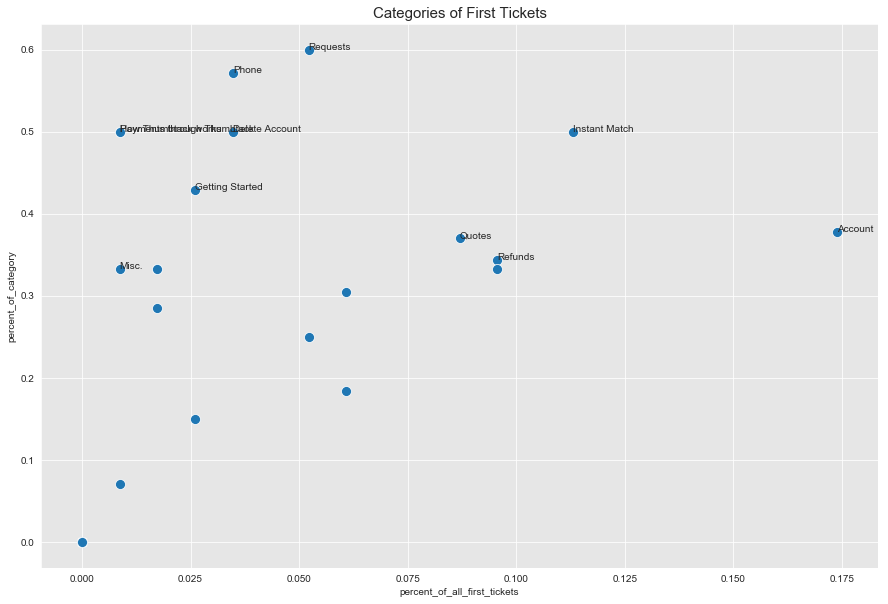

In [98]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
y = cs_first_ticket.percent_of_category
x = cs_first_ticket.percent_of_all_first_tickets
n = cs_first_ticket.index
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x=x
                , y=y
#                 , size=cs_first_ticket.td_closed_created__1_med_log
                , data=cs_first_ticket
                , s=100
                )


# fig, ax = plt.subplots()

# ax.scatter(z, y)

for i, txt in enumerate(n):
    if i <=10:
        ax.annotate(txt, (x[i], y[i]))
    else:
        ax.annotate("", (x[i], y[i]))

plt.title('Categories of First Tickets', fontsize=15)



plt.rcParams["axes.labelsize"] = 10

In [99]:
cs.groupby('dow_case_created_time').td_first_response_created.agg({'td_first_response_created': [np.size, np.median, np.max]})

/Users/wcasey/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


td_first_response_created                
                                           size median     amax
dow_case_created_time                                          
0                                          72.0   17.5   4714.0
1                                          58.0   15.5  34277.0
2                                          75.0   14.0   8688.0
3                                          71.0   20.0   9674.0
4                                          53.0   14.0   6190.0
5                                          21.0    5.0  30705.0
6                                          18.0   31.0   1525.0

In [100]:
# td_created_signup

In [101]:
3627/60/24

2.5187500000000003

In [102]:
cs[cs['td_created_signup'] < 0]

,pro_id,case_number,case_first_contact_channel,case_category,case_subcategory,case_created_time,case_closed_time,case_first_response_time,post_case_satisfaction_survey_score,pro_signup_date,...,dow_case_first_response_time,dow_pro_signup_date,dow_quote_sent_time,td_closed_created,td_closed_first_response,td_first_response_created,td_created_signup,td_first_quote_signup,min_td_created_signup,first_ticket
50,323037000000000000,4454152,Chat,Account,Edit / update,2018-03-27 19:55:00,2018-03-27 20:07:00,2018-03-27 20:07:00,NaN,2018-03-27 20:35:00,...,NaN,1,0,12.0,0.0,12.0,-40.0,270448.0,-40.0,1
128,323037000000000000,4454256,Phone,Getting Started,TT overview / how it works,2018-03-27 20:17:00,2018-03-27 22:09:00,2018-03-27 22:09:00,NaN,2018-03-27 20:35:00,...,1.0,1,0,112.0,0.0,112.0,-18.0,270448.0,-40.0,0
133,321907000000000000,4414275,Phone,Getting Started,Help getting started,2018-03-14 19:53:00,2018-03-14 20:01:00,2018-03-14 20:10:00,NaN,2018-03-14 19:59:00,...,2.0,2,4,8.0,-9.0,17.0,-6.0,2738.0,-6.0,1


In [103]:
(cs[cs['first_ticket'] == 1].td_created_signup/60/24).min()

-0.027777777777777776

<Figure size 1080x720 with 0 Axes>

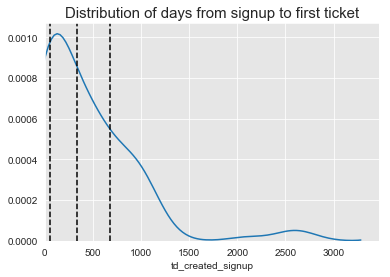

<Figure size 1080x720 with 0 Axes>

In [112]:
med = (cs[cs['first_ticket'] == 1].td_created_signup/60/24).median()
percent_25 = np.percentile((cs[cs['first_ticket'] == 1].td_created_signup/60/24), q=25)
percent_75 = np.percentile((cs[cs['first_ticket'] == 1].td_created_signup/60/24), q=75)

sns.distplot(cs[cs['first_ticket'] == 1].td_created_signup/60/24, bins=20, hist=False, kde=True)
plt.title("Distribution of days from signup to first ticket", fontsize=15)

xcoords = [percent_25, med, percent_75]
for xc in xcoords:
    plt.axvline(x=xc,color='k', linestyle='--')

plt.xlim(0)
plt.figure(figsize=(15, 10))

In [113]:
percent_25

55.456944444444446

In [105]:
ftc = cs[(cs['first_ticket'] == 1) &
    (cs['case_category'].isin(['Account', 'Instant Match', 'Quotes', 'Refunds', 'Pricing/Payments']))
    ].td_created_signup/60/24

med = ftc.median()

In [106]:
med

325.21597222222226

<Figure size 1080x720 with 0 Axes>

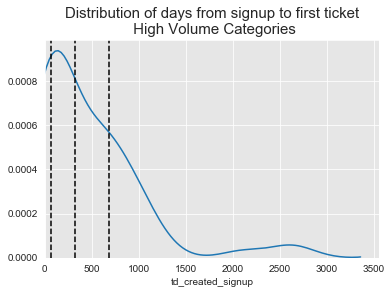

<Figure size 1080x720 with 0 Axes>

In [107]:
med = ftc.median()
percent_25 = np.percentile(ftc, q=25)
percent_75 = np.percentile(ftc, q=75)

sns.distplot(ftc, bins=20, hist=False, kde=True)
plt.title("Distribution of days from signup to first ticket\n High Volume Categories", fontsize=15)

xcoords = [percent_25, med, percent_75]
for xc in xcoords:
    plt.axvline(x=xc,color='k', linestyle='--')

plt.xlim(0)
plt.figure(figsize=(15, 10))

In [108]:
percent_25

69.015625

<Figure size 1080x720 with 0 Axes>

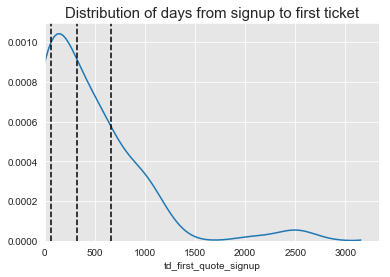

<Figure size 1080x720 with 0 Axes>

In [110]:
med = (cs[cs['first_ticket'] == 1].td_first_quote_signup/60/24).median()
percent_25 = np.percentile((cs[cs['first_ticket'] == 1].td_first_quote_signup/60/24), q=25)
percent_75 = np.percentile((cs[cs['first_ticket'] == 1].td_first_quote_signup/60/24), q=75)

sns.distplot(cs[cs['first_ticket'] == 1].td_first_quote_signup/60/24, bins=20, hist=False, kde=True)
plt.title("Distribution of days from signup to first ticket", fontsize=15)

xcoords = [percent_25, med, percent_75]
for xc in xcoords:
    plt.axvline(x=xc,color='k', linestyle='--')

plt.xlim(0)
plt.figure(figsize=(15, 10))

In [111]:
med

321.55

In [ ]:
.td_created_signup.median()/60/24

In [118]:
x = cs.groupby('case_category').agg({'td_created_signup': [np.size, np.median]})

In [119]:
x.columns = 

td_created_signup           
                                        size     median
case_category                                          
Account                                 53.0   395455.0
Account credit & refunds                38.0   485505.5
Channel specific: Chat                   1.0    85876.0
Channel specific: Email                  1.0   389546.0
Channel specific: Phone                  6.0   602232.0
Chat                                     1.0    65924.0
Deactivate account                      20.0   672678.0
Delete Account                           8.0   646542.0
Getting Started                          7.0     6192.0
How Thumbtack works                      2.0   468235.0
Instant Match                           26.0   440334.0
Jobs                                    14.0   387875.0
Landing Pages                            4.0  1321670.0
Leads                                    3.0   334320.0
MTS related concern                      7.0   505157.0
Misc.                                    3.0  1188546.0
Notifications                            1.0    80308.0
Other                                    6.0   613301.5
Payments through Thumbtack               2.0   280095.5
Phone                                    7.0   599155.0
Pricing and Payments                    33.0   647837.0
Pricing/Payments                        24.0   425378.5
Projects                                 2.0    43725.5
Quotes                                  27.0   482798.0
Quotes (prices estimates)                3.0  1735545.0
Refunds                                 32.0   453574.5
Requests                                10.0   360676.5
Reviews                                 23.0   351546.0
Services                                 4.0   326123.5

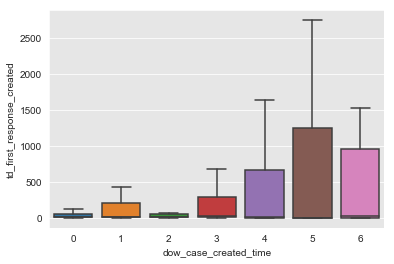

In [44]:
sns.boxplot(x = cs.dow_case_created_time, y=cs.td_first_response_created, showfliers=False)

In [ ]:
sns.boxplot(x = cs.dow_case_created_time, y=cs.td_closed_created, showfliers=False)

In [ ]:
sns.boxplot(x = cs.case_first_contact_channel, y=cs.td_closed_created, showfliers=False)

In [ ]:
plt.figure(figsize=(20, 10))
chart = sns.boxplot(x = cs.case_category, y=cs.td_closed_created, showfliers=False, orient='V' )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


In [ ]:
plt.figure(figsize=(20, 10))
chart = sns.countplot(x = cs.case_category)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [ ]:
agg_1 = cs.groupby('case_category').agg({'td_closed_created': [np.mean, np.median, np.std, np.size]})
agg_1.columns = agg_1.columns.droplevel(0)
agg_1 = agg_1.reset_index()
agg_1['log_std'] = agg_1['std'].apply(lambda x: np.log(x))
agg_1['log_mean'] = agg_1['mean'].apply(lambda x: np.log(x))

In [ ]:
agg_1.sort_values('median')

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='median', y='std', size='size', data=agg_1)

In [ ]:
agg_proid = cs.groupby('pro_id').agg({'td_closed_created': [np.mean, np.median, np.std, np.size, np.sum]})
agg_proid.columns = agg_proid.columns.droplevel(0)
agg_proid = agg_proid.reset_index()

In [ ]:
revenue_per_pro.columns = ['revenue', 'nr_jobs']

In [ ]:
agg_proid.columns = ['pro_id'
             , 'td_closed_created__mean'
            , 'td_closed_created__median'
             , 'td_closed_created__std'
            , 'td_closed_created__cnt'
            , 'td_closed_created__sum'
        
            ]

In [ ]:
agg_proid_2 = (agg_proid.sort_values('td_closed_created__sum', ascending=False)
          .merge(revenue_per_pro, left_on='pro_id', right_index=True, how='left')
          .merge(pros[['pro_id', 'conversion_rate']], on='pro_id', how='left')
)

In [ ]:
agg_proid_2

In [ ]:
sns.scatterplot(x='td_closed_created__sum', y='revenue', data = agg_proid_2[['td_closed_created__sum', 'revenue']])

In [ ]:
cs.groupby('case_category').td_first_response_created.agg({'td_first_response_created': [np.mean, np.median, np.std, np.size]})

In [ ]:
cs.groupby('pro_id').td_first_response_created.agg({'td_first_response_created': [np.size, np.median]})

In [ ]:
sns.distplot(cs['td_first_response_created'], hist=False)

In [ ]:
len(cs)

In [ ]:
len(cs.pro_id.drop_duplicates())

In [ ]:
len(pros.pro_id.drop_duplicates())

In [ ]:
pros

In [ ]:
cs